1.2: Transformers and Estimators
=================
### Classes in Action
_______________________________

Thinking about modeling as a series of transformations is really helpful.
Pipelines and functional transformations are the cleanest way to preprocess the data.

Functional transformers are reusable and you can create many complicated things with them (think about Lego blocks).

Assumptions
-------------------

1. We will be using scikit-learn interface to pipelines.

**There are 2 types of building blocks of machine learning pipelines: *transformers* and *estimators***

Theory
--------------------

There is another name for the type of operations will be doing today.

All of the pipeline transformations are just **Classes**, with functions that, yup, *Transform* the data from one form to another.

They are defined as an operation $\cdot$ such that 

$f(a: S) \rightarrow b: S$

```
"It is better to have 100 functions operate on one data structure than 10 functions on 10 data structures." —Alan Perlis
```

## Transformers are Classes! 
#### The Scikit-learm transformers are ALL classes, that inherit from the same parent classes and build upon them. This is why we can inherit them as parent classes when making our own.
The best way to learn about pre-made package classes is to read the source code! 

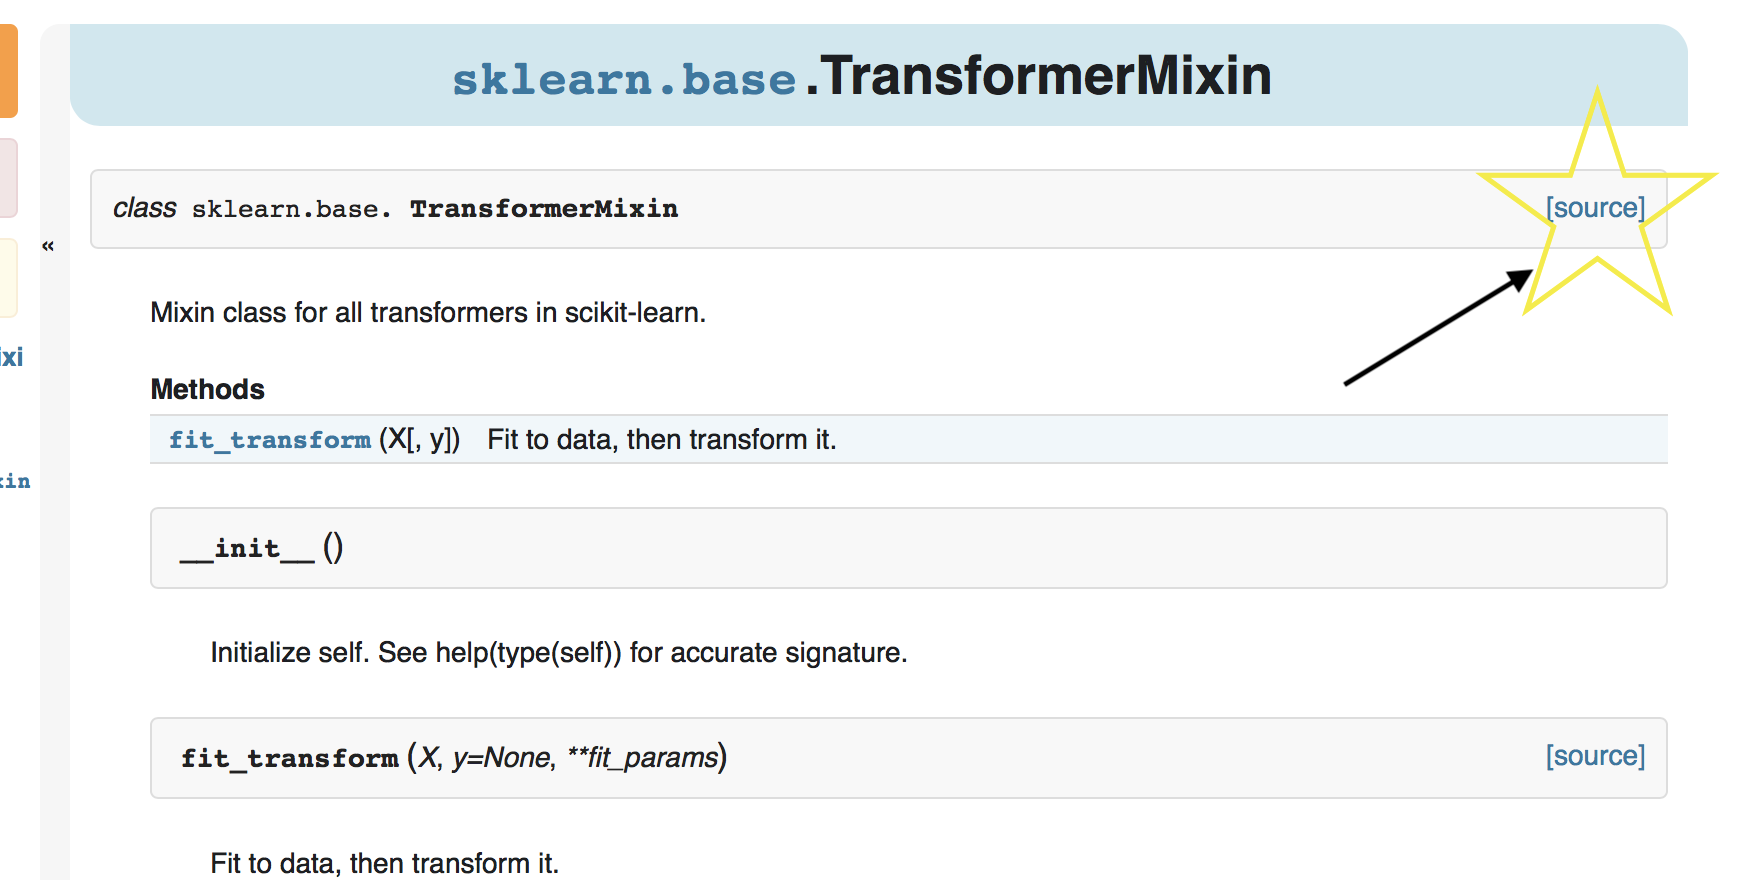


To read the source code for the BaseEstimator class, go here:
https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/base.py#L176 <br> <br>

To read the source code for the TransformerMixin class, go here:
https://github.com/scikit-learn/scikit-learn/blob/a24c8b46/sklearn/base.py#L490

QUIZ: TransformerMixin:
----------------------
By looking at the source code, we can get an understanding of what the parent class does before we inherit from it. 
This is a very good skill to have and to be able to practice.<br><br>
**EXAMPLE:** What is a Mixin?<br>
**Answer:** In object-oriented programming languages, a Mixin is a class that contains methods for use by other classes without having to be the parent class of those other classes. A mixin can also be viewed as an interface with implemented methods. Mixins encourage code reuse and can be used to avoid the inheritance ambiguity that multiple inheritance can cause the "diamond problem", or to work around lack of support for multiple inheritance in a language. (source: [wikipedia](https://en.wikipedia.org/wiki/Mixin).)
1. What are the inputs to the fit_transform method? Which are required? Which are optional? How do you know?
2. What functionality does inheriting from the TransformerMixin class give to transformers?


**Double click to see the solution**

<div class='spoiler'>
1. What are the inputs to the fit_transform method? Which are required? Which are optional? How do you know?
    1a. X, y, and parameters. X is required. y and the parameters are optional.\ We know this because y has a default
    value (None), and. the fit_params are shown to be optional with ** preceding them.
2. What functionality does inheriting from the TransformerMixin class give to transformers?
    2a. The fit_transform method (the ability to both fit and transform simultaneously without having to call each
    function separately).

</div>

QUIZ: BaseEstimator:
----------------------
**EXAMPLE:** What is an Estimator?<br>
**Answer:** In statistics, an estimator is a rule for calculating an estimate of a given quantity based on observed data: thus the rule (the estimator), the quantity of interest (the estimand) and its result (the estimate) are distinguished. Suppose there is a fixed parameter 
θ\theta  that needs to be estimated. Then an "estimator" is a function that maps the sample space to a set of sample estimates. An estimator of 
θ\theta  is usually denoted by the symbol 
θ
^ (via [wikipedia](https://en.wikipedia.org/wiki/Estimator).<br> 
The main API implemented by scikit-learn is that of the estimator.* An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data* (via [scikit-learn](http://scikit-learn.org/stable/tutorial/statistical_inference/settings.html)).

1. Give an example of an estimator in Scikit-learn that inherits from the BaseEstimator. What parameters does it set? Where are those parameters set?
2. What is the difference between a **parameter**, **argument**,  **attribute**, and **method** of an estimator?

**Double click to see the solution**

<div class='spoiler'>
1. Give an example of an estimator in Scikit-learn that inherits from the BaseEstimator. What parameters does it set? Where are those parameters set?
    1a. Logistic Regression. All parameters are set in the `__init__` statement. [Example here](https://github.com/scikit-learn/scikit-learn/blob/a24c8b464d094d2c468a16ea9f8bf8d42d949f84/sklearn/linear_model/logistic.py).

2. An **attribute** of an object is a name-value pair associated with the object, which is accessible via dot notation. The attributes specific to a particular object, as opposed to all objects of a class, are called instance attributes. **Methods** are functions that operate *on* the object or perform object-specific computations. The return values and effects of a method can depend upon and change other attributes of the object. We say that methods are *invoked* on a particular object. 
A **parameter** is a *variable* in a method definition. When a method is called, the arguments are the data you pass *into* the method's parameters.
A parameter is a variable set in the declaration of function. An argument is the actual value of this variable that gets passed to function.

- More info [here](http://composingprograms.com/pages/25-object-oriented-programming.html#objects-and-classes).
</div>

Transformers
---------
Now that we know what transformers are made up of, we can see how they work together in Pipelines.


Blocks that have input and output and can be chained with other transformers.

For example

```
Data -> [ Select variables ] -> [ Normalize ] -> [ Reduce dimensions ] -> Output
```

`[ Select variables ]` - transformer for selecting variables

`[ Normalize ]` - normalization step

`[ Reduce dimensions ]` - dimension reduction


-------------------

Because every transformer has the same type of data as input and output altogether they 
also form a transformer.

```
Input -> [ [ Select variables ] -> [ Normalize ] -> [ Reduce dimensions ] ] -> Output

Input -> [               Data preprocessing transformation                ] -> Output
```

-------------------

An example of transformer that does nothing

```python
from sklearn.base import BaseEstimator, TransformerMixin

class LazyTransformer(TransformerMixin):
    
    def __init__(self):
        pass
        
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x
```

-------------------

Notice that there are 2 methods:

1. **fit** - learns the information about the data - it becomes a _stateful_ transformer
2. **transform** - applies the transformation 

There are 2 types of transformers:
1. **stateful** - they learn something when calling fit method
2. **stateless** - they don't learn anything

**Why stateless transformers are useful?**

Transformers that don't need historical data to learn can be used in a type of learning
called `online learning`. This type of learning fits pipelines beacuse it is an algorithm
that uses the stream of observations to learn.

It doesn't keep the history so there would be no way to use stateful transformers.


** Some rules when writing transformers:**
- Think about your outputs first: what is the end-goal?
- Then: Work backwards from that end goal, to what you're starting with. Chances are this will save you a lot of time and make your code cleaner and easier to read and understand.


Exercise
--------------

1. Write a transformer that adds some number to the input, the number that is added should be passed in `__init__`
2. Write a transformer that normalizes the input:
   - in the fit method you must save the column means
3. Combine these 2 transformers into a pipeline:
   - hint: write a class that accepts list of transformers as argument
   
HINTS: All transformers are classes! All classes must have an `__init__` function. All transformers must inherit from the TransformerMixin parent class. All estimators must inherit from the BaseEstimator parent class. All transformers must have `fit` and `transform` functions (methods).

The tests you see here help you check if your trasnformers are working properly.

In [6]:
import numpy as np

# answer - start

from sklearn.base import TransformerMixin

Fill in the answer template below:

In [5]:
import numpy as np

# answer - start

from sklearn.base import TransformerMixin

class AdderTransformer(TransformerMixin):
    

class MeanNormalizer(TransformerMixin): 

    
class TransformerPipeline(TransformerMixin):


# answer - end

# tests
X = np.ones((10,10))
adder = AdderTransformer(add=1)
assert np.all(adder.transform(X) == X + 1), "Adder transformer wrong"

X = np.ones((10,10))
normalizer = MeanNormalizer()
assert np.allclose(normalizer.fit_transform(X), np.zeros((10,10))), "Mean normalizer wrong"
transformers = [AdderTransformer(add=1), 
                 AdderTransformer(add=2)]
double_adder = TransformerPipeline(transformers)

assert np.allclose(double_adder.transform(X), X+3), "TransformerPipeline wrong"

IndentationError: expected an indented block (<ipython-input-5-cb63b9bb76ac>, line 10)

In [21]:
class AdderTransformer(TransformerMixin):
    
    def __init__(self, add=0):
        self.add = add
        
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x + self.add
    
class MeanNormalizer(TransformerMixin):
    
    def __init__(self):
        pass
        
    def fit(self, x, y = None):
        self.means = x.mean(axis=0)
        return self
    
    def transform(self, x):
        return x - self.means    
    
class TransformerPipeline(TransformerMixin):
    
    def __init__(self, transformers):
        self.transformers = transformers
        
    def fit(self, x, y = None):
        x_ = x.copy()
        for transformer in self.transformers:
            transformer.fit(x_)
        return self
        
    def transform(self, x):
        x_ = x.copy()
        for transformer in self.transformers:
            x_ = transformer.transform(x_)
        return x_

In [10]:
X = np.ones((10,10))
adder = AdderTransformer(add=1)
assert np.all(adder.transform(X) == X + 1)

In [23]:
transformers = [AdderTransformer(add=1), 
                MeanNormalizer()]
pipeline = TransformerPipeline(transformers)

In [13]:
import random

In [24]:
X = np.random.rand(10,10)

In [25]:
pipeline.fit_transform(X) 

array([[0.96857952, 1.18527882, 1.43011737, 0.79361268, 1.47218528,
        0.87578927, 1.22636242, 1.34423377, 1.31741795, 1.12934964],
       [1.17657539, 0.999091  , 1.23451282, 0.76895321, 1.2929738 ,
        1.33125539, 0.73953409, 0.78882426, 1.13782846, 0.60119608],
       [0.92545228, 1.08755579, 1.04577703, 1.35470979, 0.76786799,
        0.60696094, 0.99731249, 1.48358466, 0.73321918, 0.63867546],
       [1.08836265, 0.83423635, 1.38779159, 1.07087126, 1.04450386,
        0.71286385, 0.58230696, 0.80797864, 0.73675075, 0.72985179],
       [1.06995533, 0.60494427, 0.5737742 , 0.84894368, 1.33475647,
        1.11644873, 1.23780993, 1.04510943, 0.63635767, 0.88509148],
       [1.15753532, 1.24919006, 0.70275122, 0.73878474, 0.92840038,
        0.945954  , 1.46924044, 0.49638439, 1.03041211, 1.41354445],
       [0.57571923, 0.89909538, 0.87709454, 0.84161011, 0.65353251,
        1.28793415, 0.85892785, 1.02676627, 1.41855433, 1.36595061],
       [0.55959716, 0.95317015, 0.5633168

In [ ]:
pipeline.fit_transform(X)

In [ ]:
assert np.allclose(pipeline.fit_transform(X), X+3), "TransformerPipeline wrong"

**Double click to see the solution**

<div class='spoiler'>

class AdderTransformer(TransformerMixin):
    
    def __init__(self, add=0):
        self.add = add
        
    def fit(self, x, y = None):
        return self
    
    def transform(self, x):
        return x + self.add
    
class MeanNormalizer(TransformerMixin):
    
    def __init__(self):
        pass
        
    def fit(self, x, y = None):
        self.means = x.mean(axis=0)
        return self
    
    def transform(self, x):
        return x - self.means    
    
class TransformerPipeline(TransformerMixin):
    
    def __init__(self, transformers):
        self.transformers = transformers
        
    def fit(self, x, y = None):
        x_ = x.copy()
        for transformer in self.transformers:
            x_ = transformer.fit(x_)
        return self
        
    def transform(self, x):
        x_ = x.copy()
        for transformer in self.transformers:
            x_ = transformer.transform(x_)
        return x_
</div>